In [0]:
from google.colab import drive
from google.colab import files


drive.mount('/content/gdrive',force_remount=True)
root_path = 'gdrive/My Drive/ids_data/'


Mounted at /content/gdrive


In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [0]:
#start
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
data_train = pd.read_table("/content/gdrive/My Drive/ids_data/KDDTrain.txt", sep=",", names=datacols) # change path to where the dataset is located.
data_train = data_train.iloc[:,:-1] # removes an unwanted extra field
# Load NSL_KDD test dataset
data_test = pd.read_table("/content/gdrive/My Drive/ids_data/KDDTest.txt", sep=",", names=datacols)
data_test = data_test.iloc[:,:-1]


In [0]:
# mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
#         'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
#         'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
#         'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
#         'sqlattack': 'U2R','httptunnel': 'U2R',
#         'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
#         'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
#         'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
#         'normal': 'Normal'
#         }

In [0]:
# # 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
# data_train['attack_class'] = data_train['attack'].apply(lambda v: mapping[v])
# data_test['attack_class'] = data_test['attack'].apply(lambda v: mapping[v])

In [0]:
data_train.head(5)

,src_bytes,dst_bytes,logged_in,count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_serror_rate,service,attack
0,491,0,0,2,25,0.03,0.17,0.00,ftp_data,normal
1,146,0,0,13,1,0.60,0.88,0.00,other,normal
2,0,0,0,123,26,0.05,0.00,1.00,private,neptune
3,232,8153,1,5,255,0.00,0.03,0.01,http,normal
4,199,420,1,30,255,0.00,0.00,0.00,http,normal


In [0]:
# data_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# data_test.drop(['num_outbound_cmds'], axis=1, inplace=True)
# # Attack Class Distribution
# attack_class_freq_train = data_train[['attack_class']].apply(lambda x: x.value_counts())
# attack_class_freq_test = data_test[['attack_class']].apply(lambda x: x.value_counts())
# attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
# attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

# attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
# attack_class_dist
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # extract numerical attributes and scale it to have zero mean and unit variance  
# cols = data_train.select_dtypes(include=['float64','int64']).columns
# sc_train = scaler.fit_transform(data_train.select_dtypes(include=['float64','int64']))
# sc_test = scaler.fit_transform(data_test.select_dtypes(include=['float64','int64']))

# # turn the result back to a dataframe
# sc_traindf = pd.DataFrame(sc_train, columns = cols)
# sc_testdf = pd.DataFrame(sc_test, columns = cols)
# #Encoding of Categorical Attributes
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# # extract categorical attributes from both training and test sets 
# cattrain = data_train.select_dtypes(include=['object']).copy()
# cattest = data_test.select_dtypes(include=['object']).copy()

# # encode the categorical attributes
# traincat = cattrain.apply(encoder.fit_transform)
# testcat = cattest.apply(encoder.fit_transform)

# # separate target column from encoded data 
# enctrain = traincat.drop(['attack_class'], axis=1)
# enctest = testcat.drop(['attack_class'], axis=1)

# cat_Ytrain = traincat[['attack_class']].copy()
# cat_Ytest = testcat[['attack_class']].copy()
# from imblearn.over_sampling import RandomOverSampler 
# from collections import Counter

# # define columns and extract encoded train set for sampling 
# sc_traindf = data_train.select_dtypes(include=['float64','int64'])
# refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
# refclass = np.concatenate((sc_train, enctrain.values), axis=1)
# X = refclass

# # reshape target column to 1D array shape  
# c, r = cat_Ytest.values.shape
# y_test = cat_Ytest.values.reshape(c,)

# c, r = cat_Ytrain.values.shape
# y = cat_Ytrain.values.reshape(c,)

# # apply the random over-sampling
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_sample(X, y)
# print('Original dataset shape {}'.format(Counter(y)))
# print('Resampled dataset shape {}'.format(Counter(y_res)))
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier();

# # fit random forest classifier on the training set
# rfc.fit(X_res, y_res);
# # extract important features
# score = np.round(rfc.feature_importances_,3)
# importances = pd.DataFrame({'feature':refclasscol,'importance':score})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# # plot importances
# plt.rcParams['figure.figsize'] = (11, 4)
# importances.plot.bar();
# from sklearn.feature_selection import RFE
# import itertools
# rfc = RandomForestClassifier()

# # create the RFE model and select 10 attributes
# rfe = RFE(rfc, n_features_to_select=10)
# rfe = rfe.fit(X_res, y_res)

# # summarize the selection of the attributes
# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
# selected_features = [v for i, v in feature_map if i==True]




# # define columns to new dataframe
# newcol = list(refclasscol)
# newcol.append('attack_class')

# # add a dimension to target
# new_y_res = y_res[:, np.newaxis]

# # create a dataframe from sampled data
# res_arr = np.concatenate((X_res, new_y_res), axis=1)
# res_df = pd.DataFrame(res_arr, columns = newcol) 

# # create test dataframe
# reftest = pd.concat([sc_testdf, testcat], axis=1)
# reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
# reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
# reftest['flag'] = reftest['flag'].astype(np.float64)
# reftest['service'] = reftest['service'].astype(np.float64)

# res_df.shape
# reftest.shape


In [0]:
#usual
selected_features = ['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'attack']
data_train = data_train[selected_features]
data_test = data_test[selected_features]
frames = [data_train,data_test]
result = pd.concat(frames)

In [0]:
print(data_test.shape)
print(data_train.shape)
print(result.shape)

(22544, 9)
(125973, 9)
(148517, 9)


In [0]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [0]:
# # 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
# data_train['attack_class'] = data_train['attack'].apply(lambda v: mapping[v])
# data_test['attack_class'] = data_test['attack'].apply(lambda v: mapping[v])
result['attack_class'] = result['attack'].apply(lambda v: mapping[v])

In [0]:
print(result.shape)

(148517, 10)


In [0]:
del result['attack']
print(result.shape)

(148517, 9)


In [0]:
# result['service'] = pd.Categorical(result['service'])
# dfDummies = pd.get_dummies(result['service'], prefix = 'category')


In [0]:
# del result['service']


In [0]:
print(result.shape)


(148517, 9)


In [0]:
result.head(3)

,src_bytes,dst_bytes,logged_in,count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_serror_rate,attack_class
0,491,0,0,2,25,0.03,0.17,0.0,Normal
1,146,0,0,13,1,0.60,0.88,0.0,Normal
2,0,0,0,123,26,0.05,0.00,1.0,DoS


In [0]:

X= result.iloc[:,:8]
Y= result.iloc[:,-1]

In [0]:
print(X.shape)
print(Y.shape)

(148517, 8)
(148517,)


In [0]:
X= pd.concat([X, dfDummies], axis=1)


In [0]:
print(X.shape)

(148517, 78)


In [0]:
X  = X.values
Y  = Y.values


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(89110, 78)
(89110,)
(59407, 78)
(59407,)


In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
Y_train = np_utils.to_categorical(encoded_Y)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(Y_test)
encoded_Y = encoder.transform(Y_test)
# convert integers to dummy variables (i.e. one hot encoded)
Y_test = np_utils.to_categorical(encoded_Y)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(89110, 78)
(59407, 78)
(89110, 5)
(59407, 5)


In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense

model = Sequential()
model.add(Dense(128, input_dim=78, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               10112     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 645       
Total params: 10,757
Trainable params: 10,757
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, Y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_test, Y_test))


Train on 89110 samples, validate on 59407 samples
Epoch 1/50
89110/89110 [==============================] - 17s 188us/step - loss: 1.0316 - acc: 0.9105 - val_loss: 0.7939 - val_acc: 0.9357
Epoch 2/50
89110/89110 [==============================] - 17s 190us/step - loss: 0.7590 - acc: 0.9369 - val_loss: 0.7608 - val_acc: 0.9412
Epoch 3/50
89110/89110 [==============================] - 17s 187us/step - loss: 0.7514 - acc: 0.9375 - val_loss: 0.6491 - val_acc: 0.9481
Epoch 4/50
89110/89110 [==============================] - 17s 186us/step - loss: 0.7953 - acc: 0.9351 - val_loss: 0.9866 - val_acc: 0.9270
Epoch 5/50
89110/89110 [==============================] - 17s 186us/step - loss: 0.6540 - acc: 0.9481 - val_loss: 0.7472 - val_acc: 0.9207
Epoch 6/50
89110/89110 [==============================] - 16s 184us/step - loss: 0.6278 - acc: 0.9495 - val_loss: 0.5952 - val_acc: 0.9523
Epoch 7/50
89110/89110 [==============================] - 17s 186us/step - loss: 0.6303 - acc: 0.9494 - val_loss: 0.

# Evaluating the Model

In [0]:
print(Y_train[4])#DOS
print(Y_train[3])#R2U
print(Y_train[1])#Normal
print(Y_train[2323])
print(Y_train[836])#Probe


np.savetxt(r'testing.txt', X_train, fmt='%d')


[1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0.]


Train loss: 0.36905616134081837
Train accuracy: 0.9651329817146902
Test loss: 0.3656426795672604
Test accuracy: 0.9650714562256973


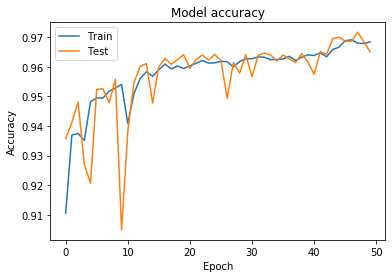

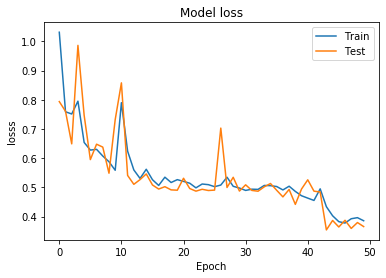

In [0]:
score = model.evaluate(X_train, Y_train, verbose=0)
trainerr = model.evaluate(X_test, Y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
print('Test loss:',trainerr[0])
print('Test accuracy:',trainerr[1])



import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('losss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



In [0]:
model.save("model1.h5")

# Predicting on new Data

In [0]:
data = X_train[836].reshape(1,78)

pred1  = model.predict(data)
y_classes = pred1.argmax(axis=-1)
# print(y_classes)
if(y_classes==0):
    print("DOS ATTACK DETECTED")
elif(y_classes==1):
    print("NORMAL PACKET DATA")
elif(y_classes==2):
    print("PROBE ATTACK(Probe) DETECTED")
elif(y_classes==3):
    print("REMOTE TO USER ATTACK(R2U) DETECTED")


PROBE ATTACK(Probe) DETECTED
